<a href="https://colab.research.google.com/github/Selami7321/Python-ile-Makine-renmesi-Uygulamalar-/blob/main/KNN_Algorithm_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Veri Seti Bilgileri:
Özellik sayısı: 30
Örnek sayısı: 569
Kanser türleri: ['malignant' 'benign']
Hedef değişken dağılımı:
target_name
benign       357
malignant    212
Name: count, dtype: int64

Model Performansı
Eğitim seti doğruluğu: 0.9497
Test seti doğruluğu: 0.9240

Sınıflandırma Raporu:

Karışıklık Matrisi:

Örnek Tahminler (İlk 10 Test Örneği)
Gerçek Değer -> Tahmin Değeri


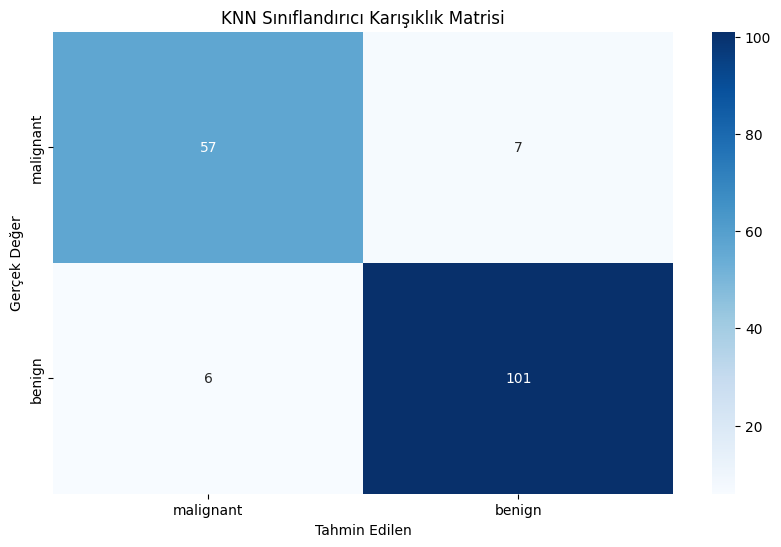

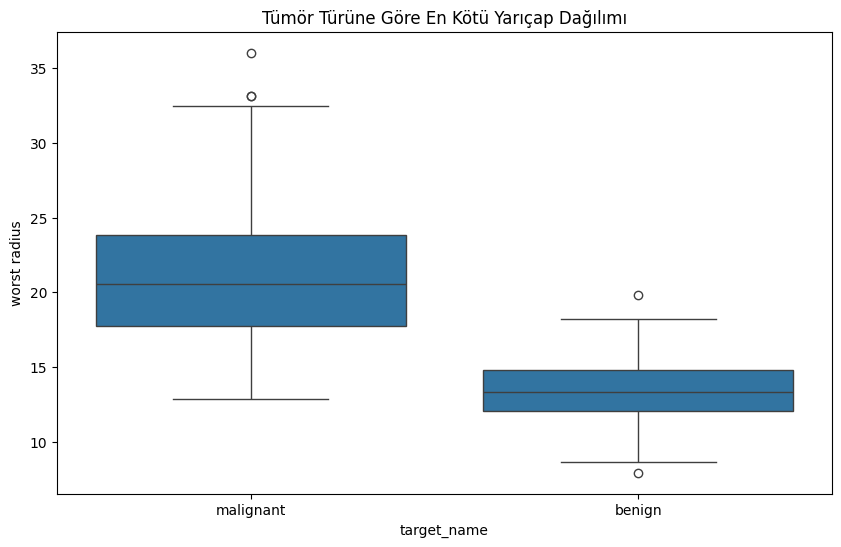

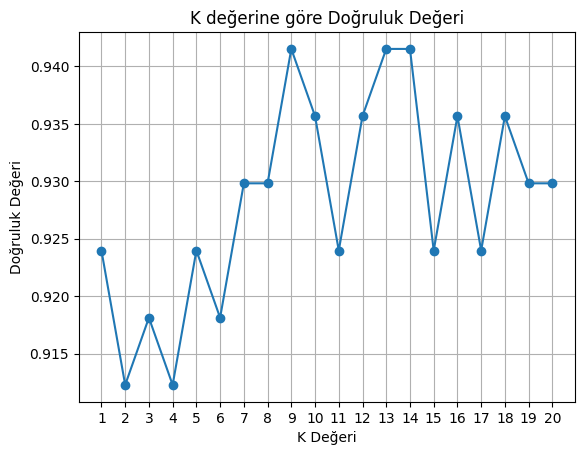

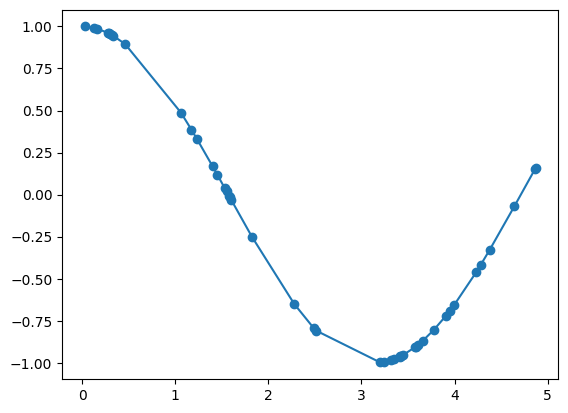

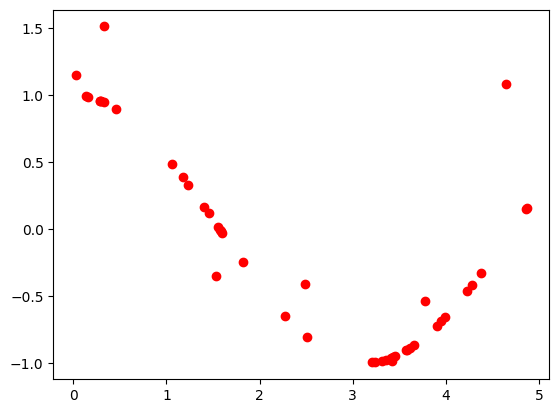

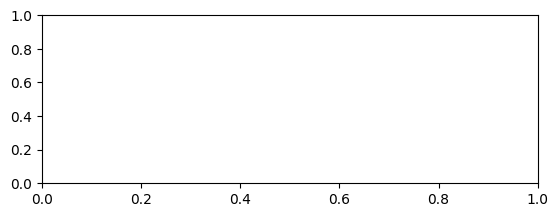

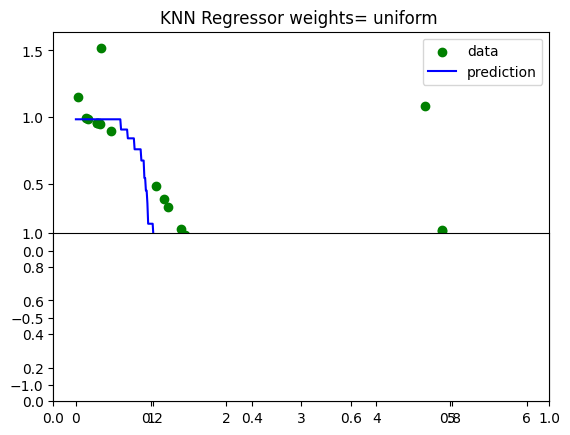

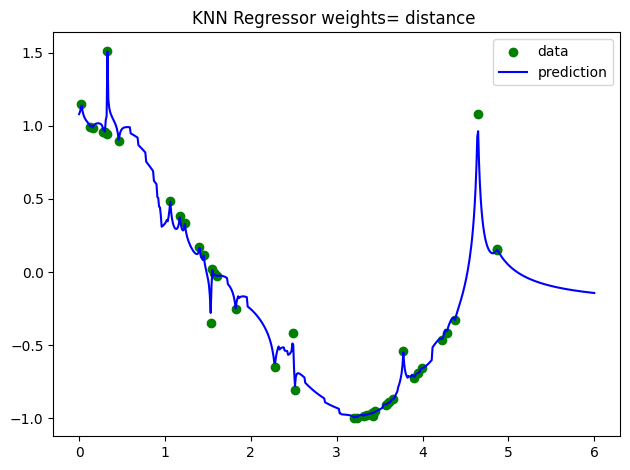

In [22]:
# Gerekli kütüphaneler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Threading ile ilgili sorunları çözmek için
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'

# 1. Veri setini yükleme
cancer = load_breast_cancer()

# Veri setini DataFrame'e dönüştürme
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target
df["target_name"] = df["target"].map({0: "malignant", 1: "benign"})

# Veri seti bilgilerini görüntüleme
print("\n" + "="*50)
print("Veri Seti Bilgileri:")
print("="*50)
print(f"Özellik sayısı: {cancer.data.shape[1]}")
print(f"Örnek sayısı: {cancer.data.shape[0]}")
print(f"Kanser türleri: {cancer.target_names}")
print(f"Hedef değişken dağılımı:\n{df['target_name'].value_counts()}")
print("="*50 + "\n")

# 2. Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    test_size=0.3,  # %30 test seti
    random_state=42,  # sonuçların tekrarlanabilirliği
    stratify=cancer.target  # sınıf dağılımını koru
)

# 3. Makine öğrenimi modeli (KNN) ve eğitim
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors parametresi ile komşu sayısı
knn.fit(X_train, y_train)

# 4. Model değerlendirme
# Eğitim seti performansı
train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Test seti performansı
y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Sınıflandırma raporu
class_report = classification_report(y_test, y_pred, target_names=cancer.target_names)

# Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)

# 5. Sonuçları görüntüleme
print("="*50)
print("Model Performansı")
print("="*50)
print(f"Eğitim seti doğruluğu: {train_accuracy:.4f}")
print(f"Test seti doğruluğu: {test_accuracy:.4f}")
print("\nSınıflandırma Raporu:")
print("\nKarışıklık Matrisi:")

print("="*50)

# 6. Örnek tahminler
print("\n" + "="*50)
print("Örnek Tahminler (İlk 10 Test Örneği)")
print("="*50)
print("Gerçek Değer -> Tahmin Değeri")
for i in range(10):
    actual = cancer.target_names[y_test[i]]
    #predicted = cancer.target_names[y_pred[i]]
    #print(f"Örnek {i+1}: {actual} -> {predicted}")

# 7. Görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=cancer.target_names,
yticklabels=cancer.target_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('KNN Sınıflandırıcı Karışıklık Matrisi')
plt.show()

# Özellik önemliliği olmamasına rağmen, bazı özelliklerin dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(x='target_name', y='worst radius', data=df)
plt.title('Tümör Türüne Göre En Kötü Yarıçap Dağılımı')
plt.show()


# Accuracy Values

# k = 1,2,3

accuracy_values= []
k_values = []
for(k) in range(1,21) :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

plt.figure()
plt.plot(k_values,accuracy_values, marker = "o" , linestyle = "-")
plt.title("K değerine göre Doğruluk Değeri")
plt.xlabel("K Değeri")
plt.ylabel("Doğruluk Değeri")
plt.xticks(k_values)
plt.grid(True)
plt.show()



#  %%
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
X = np.sort( 5 * np.random.rand(45,1),axis= 0)   # Features
y= np.cos(X).ravel() #Target
plt.plot(X,y)
plt.scatter(X,y)
plt.show()

noise_indices= y[::7]
y[::7] += 2 * ((0.6) - np.random.rand(len(noise_indices)))
plt.scatter(X,y,color="red")
plt.show()


T=np.linspace(0,6,600)[:, np.newaxis]

for i,weight in enumerate(["uniform","distance"]):
    knn = KNeighborsRegressor(n_neighbors=10,weights=weight)
    y_pred=knn.fit(X,y).predict(T)

    plt.subplot(2,1,i+1)
    plt.figure()
    plt.scatter(X,y,color="green",label="data")
    plt.plot(T,y_pred,color="blue",label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNN Regressor weights= {} ".format(weight))

plt.tight_layout()
plt.show()